<a href="https://colab.research.google.com/github/missfaz/COMBINEIMAGE/blob/master/Pouchtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!mkdir images
!mkdir images/classONE
!mkdir images/classTWO

In [2]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1nKcZbz4VcxQesBeFR3a-IjkI7EtyV6B4' -O deeplearn.py

--2020-05-28 03:04:05--  https://docs.google.com/uc?export=download&id=1nKcZbz4VcxQesBeFR3a-IjkI7EtyV6B4
Resolving docs.google.com (docs.google.com)... 74.125.31.113, 74.125.31.139, 74.125.31.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.31.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/frc3e5tq633n9543f2g6f7gfboel3en5/1590635025000/04224418538677720728/*/1nKcZbz4VcxQesBeFR3a-IjkI7EtyV6B4?e=download [following]
--2020-05-28 03:04:05--  https://doc-0c-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/frc3e5tq633n9543f2g6f7gfboel3en5/1590635025000/04224418538677720728/*/1nKcZbz4VcxQesBeFR3a-IjkI7EtyV6B4?e=download
Resolving doc-0c-a0-docs.googleusercontent.com (doc-0c-a0-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-0c-a0-docs.googleusercontent.com (doc-0c-a0-docs

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [0]:
from IPython.display import Image
i = 0
while(1):
  try:
    filename = take_photo('images/classONE/'+str(i)+'.jpg')
    print('Saved to {}'.format(filename))
    i+=1
  except Exception as err:
    print(str(err))

In [0]:
from IPython.display import Image
i = 10
while(1):

  try:
    filename = take_photo('images/classTWO/'+str(i)+'.jpg')
    print('Saved to {}'.format(filename))
    i+=1    
  except Exception as err:
    print(str(err))

In [9]:
from deeplearn import trainInit, train,checkData


'''it return images in required format and 
number of images use in each step'''
train_generator, step_size_train = trainInit()

'''train the images and save a model
epochs means how many times training need to done'''
train(train_generator, step_size_train,  epochs=5)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 0s 0us/step
Found 55 images belonging to 2 classes.
Epoch 1/5
1/1 [==============================] - 9s 9s/step - loss: 0.7722 - accuracy: 0.3478
Epoch 2/5
1/1 [==============================] - 5s 5s/step - loss: 4.6781 - accuracy: 0.3750
Epoch 3/5
1/1 [==============================] - 3s 3s/step - loss: 0.0234 - accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 5s 5s/step - loss: 2.7751 - accuracy: 0.4375
Epoch 5/5
1/1 [==============================] - 4s 4s/step - loss: 0.0015 - accuracy: 1.0000


<IPython.core.display.Javascript object>

Saved to photo.jpg


/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


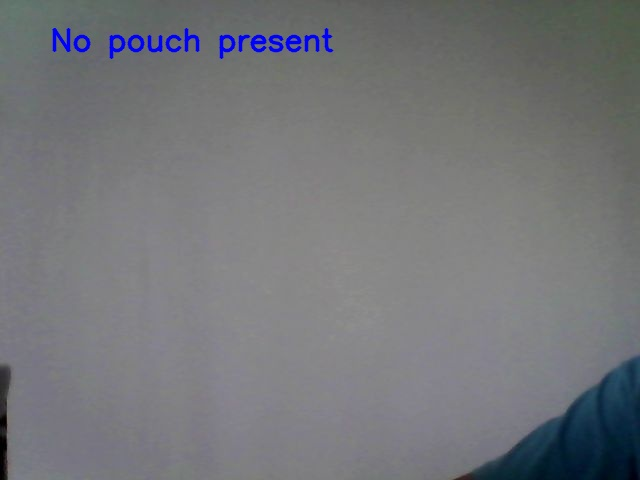

In [11]:
from deeplearn import loadModel,load_image
import cv2
filename = take_photo()
print('Saved to {}'.format(filename))
model = loadModel()
font = cv2.FONT_HERSHEY_SIMPLEX 
# org 
org = (50, 50) 
# fontScale 
fontScale = 1
# Blue color in BGR 
color = (255, 0, 0) 
# Line thickness of 2 px 
thickness = 2
  # Show the image which was just taken.
frame = cv2.imread('photo.jpg')
new_image = load_image(frame)
pred = model.predict(new_image)

if(pred[0][0] > pred[0][1]):
          text = 'Pouch present'
else:
          text = 'No pouch present'
frame = cv2.putText(frame, text, org, font,  
              fontScale, color, thickness, cv2.LINE_AA) 
#show the image
cv2.imwrite('photo.jpg', frame)
display(Image(filename))